In [3]:
# import dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# add the lat and lngs from practice into a list
coordinates = list(lat_lngs)

In [6]:
# import citipy module
from citipy import citipy

In [7]:
# create a list for holding the cities
cities = []

# identify nearest city for each lat and lng 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique then we will add to cities list
    if city not in cities:
        cities.append(city)
    

# print the city count to confirm count
len(cities)

628

In [8]:
# import dependecies pt2
import requests
from config import weather_api_key
from datetime import datetime

# build basic url with api key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bat khela
Processing Record 2 of Set 1 | millinocket
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | qazvin
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | naze
Processing Record 7 of Set 1 | matay
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | faya
Processing Record 10 of Set 1 | port moresby
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | aktash
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | cayenne
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | abu samrah
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | beringovskiy
Processing Record 21 of Set 1 | huilong
Processing Record 22 of Set 1 | mitsamiouli
Processing Re

Processing Record 40 of Set 4 | pinega
Processing Record 41 of Set 4 | atambua
Processing Record 42 of Set 4 | aswan
Processing Record 43 of Set 4 | arman
Processing Record 44 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 45 of Set 4 | ughelli
Processing Record 46 of Set 4 | viedma
Processing Record 47 of Set 4 | ponta do sol
Processing Record 48 of Set 4 | chake chake
Processing Record 49 of Set 4 | gamba
Processing Record 50 of Set 4 | rumilly
Processing Record 1 of Set 5 | cabatuan
Processing Record 2 of Set 5 | souillac
Processing Record 3 of Set 5 | plakhtiyivka
Processing Record 4 of Set 5 | wanning
Processing Record 5 of Set 5 | iranshahr
Processing Record 6 of Set 5 | berdigestyakh
Processing Record 7 of Set 5 | cajabamba
Processing Record 8 of Set 5 | torbay
Processing Record 9 of Set 5 | east london
Processing Record 10 of Set 5 | tezu
Processing Record 11 of Set 5 | gorontalo
Processing Record 12 of Set 5 | butaritari
Processing Record 13 of Set 5 | s

Processing Record 32 of Set 8 | pyinmana
Processing Record 33 of Set 8 | narasannapeta
Processing Record 34 of Set 8 | nome
Processing Record 35 of Set 8 | campbell river
Processing Record 36 of Set 8 | port macquarie
Processing Record 37 of Set 8 | tagusao
Processing Record 38 of Set 8 | bardiyah
Processing Record 39 of Set 8 | herford
Processing Record 40 of Set 8 | tautira
Processing Record 41 of Set 8 | barcelos
Processing Record 42 of Set 8 | ubaira
Processing Record 43 of Set 8 | itarema
Processing Record 44 of Set 8 | gandai
Processing Record 45 of Set 8 | clyde river
Processing Record 46 of Set 8 | coari
Processing Record 47 of Set 8 | magdagachi
Processing Record 48 of Set 8 | kortkeros
Processing Record 49 of Set 8 | belmonte
Processing Record 50 of Set 8 | varna
Processing Record 1 of Set 9 | bam
Processing Record 2 of Set 9 | waverly
Processing Record 3 of Set 9 | vershino-darasunskiy
Processing Record 4 of Set 9 | port keats
Processing Record 5 of Set 9 | sabha
Processing 

Processing Record 20 of Set 12 | mana
Processing Record 21 of Set 12 | alta floresta
Processing Record 22 of Set 12 | merauke
Processing Record 23 of Set 12 | damoh
Processing Record 24 of Set 12 | dawlatabad
Processing Record 25 of Set 12 | kuching
Processing Record 26 of Set 12 | utiroa
City not found. Skipping...
Processing Record 27 of Set 12 | ponta delgada
Processing Record 28 of Set 12 | haines junction
Processing Record 29 of Set 12 | xinpu
Processing Record 30 of Set 12 | bandipur
Processing Record 31 of Set 12 | vanderhoof
Processing Record 32 of Set 12 | bartlesville
Processing Record 33 of Set 12 | tommot
Processing Record 34 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 35 of Set 12 | gizo
Processing Record 36 of Set 12 | kenora
Processing Record 37 of Set 12 | stephenville crossing
Processing Record 38 of Set 12 | anadyr
Processing Record 39 of Set 12 | alberton
Processing Record 40 of Set 12 | saint-denis
Processing Record 41 of Set 12 | manyana
Pro

In [10]:
# convert the array of dictionaries/data into a pd df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bat Khela,34.6167,71.9714,59.32,55,0,6.22,PK,2021-03-17 20:17:47
1,Millinocket,45.6573,-68.7098,50.00,20,1,8.05,US,2021-03-17 20:17:48
2,Mahebourg,-20.4081,57.7000,78.80,73,40,9.22,MU,2021-03-17 20:17:49
3,Qazvin,36.2797,50.0049,57.20,58,91,13.80,IR,2021-03-17 20:17:49
4,Puerto Ayora,-0.7393,-90.3518,84.20,70,40,6.91,EC,2021-03-17 20:17:50
5,Naze,28.3667,129.4833,65.30,86,95,4.23,JP,2021-03-17 20:15:19
6,Matay,28.4190,30.7792,58.57,35,0,6.42,EG,2021-03-17 20:17:50
7,Vaini,-21.2000,-175.2000,78.80,89,40,6.91,TO,2021-03-17 20:14:18
8,Faya,18.3851,42.4509,64.40,88,0,2.95,SA,2021-03-17 20:17:52
9,Port Moresby,-9.4431,147.1797,73.40,100,75,4.61,PG,2021-03-17 20:17:54


In [11]:
# reorder columns in df 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bat Khela,PK,2021-03-17 20:17:47,34.6167,71.9714,59.32,55,0,6.22
1,Millinocket,US,2021-03-17 20:17:48,45.6573,-68.7098,50.00,20,1,8.05
2,Mahebourg,MU,2021-03-17 20:17:49,-20.4081,57.7000,78.80,73,40,9.22
3,Qazvin,IR,2021-03-17 20:17:49,36.2797,50.0049,57.20,58,91,13.80
4,Puerto Ayora,EC,2021-03-17 20:17:50,-0.7393,-90.3518,84.20,70,40,6.91
5,Naze,JP,2021-03-17 20:15:19,28.3667,129.4833,65.30,86,95,4.23
6,Matay,EG,2021-03-17 20:17:50,28.4190,30.7792,58.57,35,0,6.42
7,Vaini,TO,2021-03-17 20:14:18,-21.2000,-175.2000,78.80,89,40,6.91
8,Faya,SA,2021-03-17 20:17:52,18.3851,42.4509,64.40,88,0,2.95
9,Port Moresby,PG,2021-03-17 20:17:54,-9.4431,147.1797,73.40,100,75,4.61


In [12]:
# create an ouput file (csv)
output_data_file = "weather_data/cities.csv"

# export the city data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

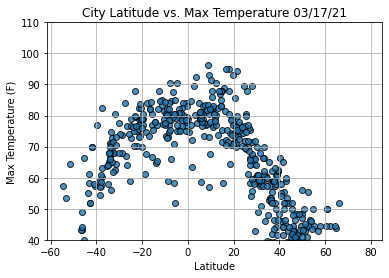

In [14]:
# import time module
import time

# build the scatter plot for lat v max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(40, 110)
plt.grid(True)

# save the fig
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()


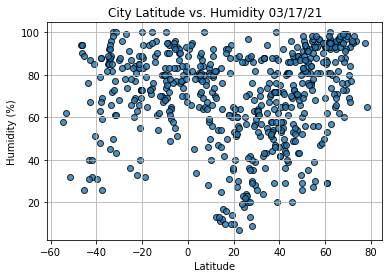

In [15]:
# build the scatter plot for lat v humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the fig
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()


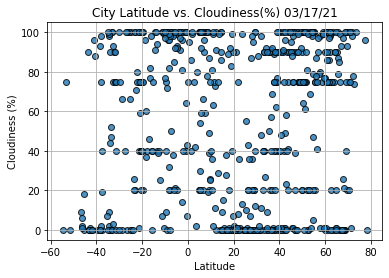

In [16]:
# build the scatter plot for lat v cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the fig
plt.savefig("weather_data/Fig3.png")

# show plot
plt.show()


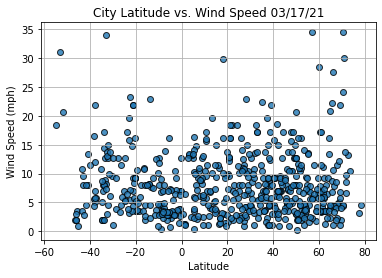

In [17]:
# build the scatter plot for lat v wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save the fig
plt.savefig("weather_data/Fig4.png")

# show plot
plt.show()


In [66]:
# import linregress
from scipy.stats import linregress

# create a function to create linear regression on weather data and plot line and equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # run regression on hemisphere data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # calculate the regression line "y val" from the slope intercept
    regress_values = x_values * slope + intercept
    
    # get the equation of the line 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # create a scatter plt and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show

In [19]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2021-03-17 20:12:55
Lat                         -54.8
Lng                         -68.3
Max Temp                     57.2
Humidity                       58
Cloudiness                      0
Wind Speed                  18.41
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bat Khela,PK,2021-03-17 20:17:47,34.6167,71.9714,59.32,55,0,6.22
1,Millinocket,US,2021-03-17 20:17:48,45.6573,-68.7098,50.00,20,1,8.05
3,Qazvin,IR,2021-03-17 20:17:49,36.2797,50.0049,57.20,58,91,13.80
5,Naze,JP,2021-03-17 20:15:19,28.3667,129.4833,65.30,86,95,4.23
6,Matay,EG,2021-03-17 20:17:50,28.4190,30.7792,58.57,35,0,6.42


In [21]:
# create norther and southern hemisphere df
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

(35.0, 110.0)

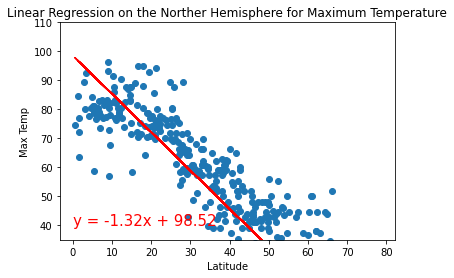

In [60]:
# linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Norther Hemisphere for Maximum Temperature', 'Max Temp',(0,40))

# annotate
plt.ylim(35, 110)

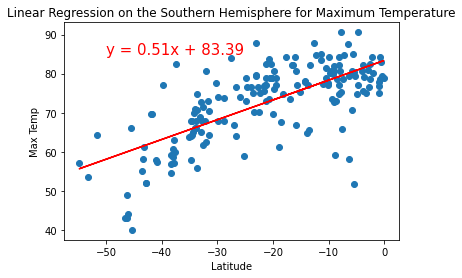

In [68]:
# linear regression on the southern hemi
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp", (-50,85))

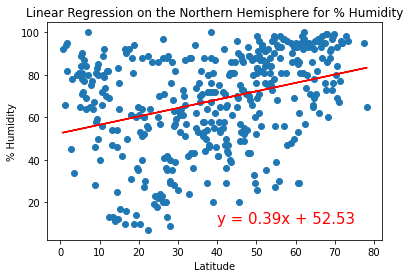

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

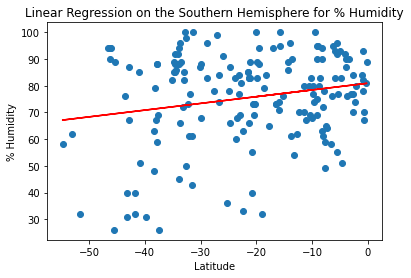

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

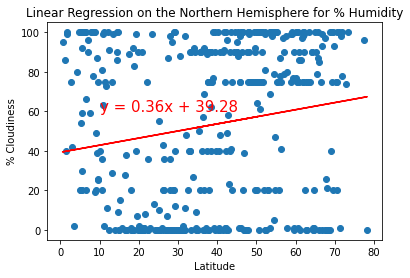

In [76]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Cloudiness',(10,60))

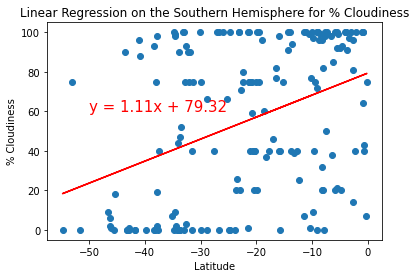

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

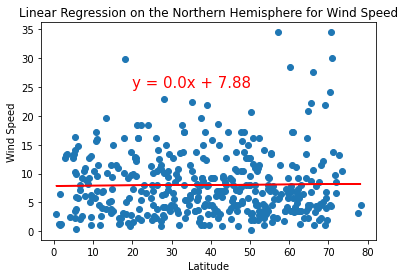

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(20,25))

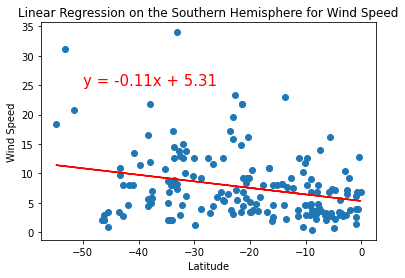

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))